In [ ]:
# Example usage:
from Invasion.invasion import (
    compute_nontrivial_slice,
    simulate_segment,
    compute_deltaW_curve,
    compare_severities,
    test_plot,
    compare_scalers,
    run_cycles,
    run_cycles_ext,
    simulate_segment2,
    run_invasion,
    pairwise_invasion_plot,
    piplot,
    local_invasibility_heatmap
)

W_birth = 0.4
W_death = 0.1
Y_birth = 0.9
Y_death = 0.15

X_in = 0.1
X_out = 0.1
Z_in = 0.5
Z_out = 0.25

Time = 600.0
dt = 0.1

use_X = True
use_Z = False

num_points = 100
severity = 0.5
cycles = 2000
extinction_rate = 50
U_out = 0.05
U_in = U_out
X_out = 0.06
X_in = X_out

W,Y = compute_nontrivial_slice(W_birth, W_death, Y_birth, Y_death)
W0 = W/2
X0 = W0 / (X_out / X_in)
V0 = W - W0
U0 = V0 / (U_out / U_in)
Y0 = Y
Z0 = Y0/ (Z_out /Z_in)
dt = 0.1

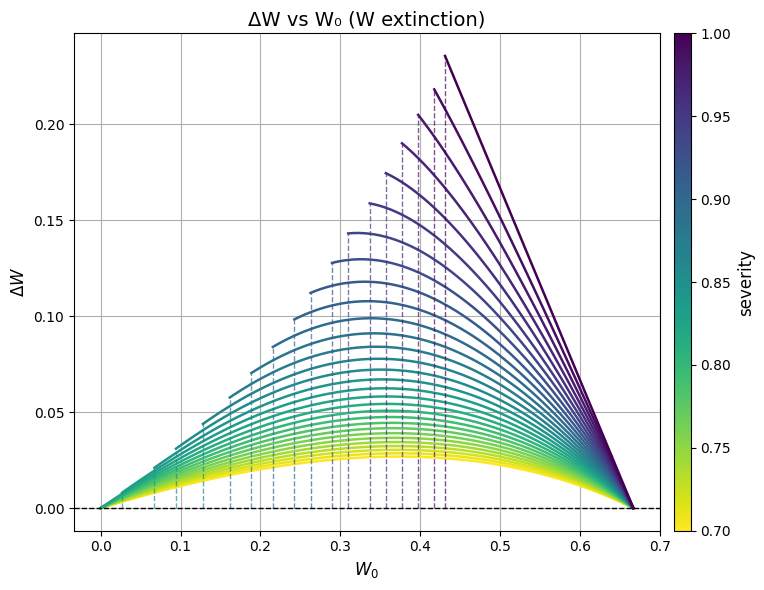

'test_plot(\n    W_birth=W_birth, Y_birth=Y_birth,\n    W_death=W_death, Y_death=Y_death,\n    X_in=X_in, Z_in=Z_in, X_out=X_out, Z_out=Z_out,\n    W0=0.01,\n    Time=200.0, dt=0.01,\n    use_X=use_X, use_Z=use_Z,\n    severity=0.96842105,  # actual shock multiplier = (1 - 0.3) = 0.7\n     perturb_W=False, perturb_Y=True,\n    perturb_time=20.0,\n    tol=1e-6\n)'

In [2]:
    # Compare severities
x = compare_severities(
        W_birth=W_birth, Y_birth=Y_birth,
        W_death=W_death, Y_death=Y_death,
        X_in=X_in, Z_in=Z_in, X_out=X_out, Z_out=Z_out,
        Time=Time, dt=dt, use_X=use_X, use_Z=use_Z,
        num_points=num_points,
        severity_range=(0.7, 1), n_sev=30,
         perturb_W=True, perturb_Y=False,
        tol=1e-6, verbose=False
    )

    # Test‐plot at W0 = 0.1, with severity interpreted as 1−severity
'''test_plot(
        W_birth=W_birth, Y_birth=Y_birth,
        W_death=W_death, Y_death=Y_death,
        X_in=X_in, Z_in=Z_in, X_out=X_out, Z_out=Z_out,
        W0=0.01,
        Time=200.0, dt=0.01,
        use_X=use_X, use_Z=use_Z,
        severity=0.96842105,  # actual shock multiplier = (1 - 0.3) = 0.7
         perturb_W=False, perturb_Y=True,
        perturb_time=20.0,
        tol=1e-6
    )'''

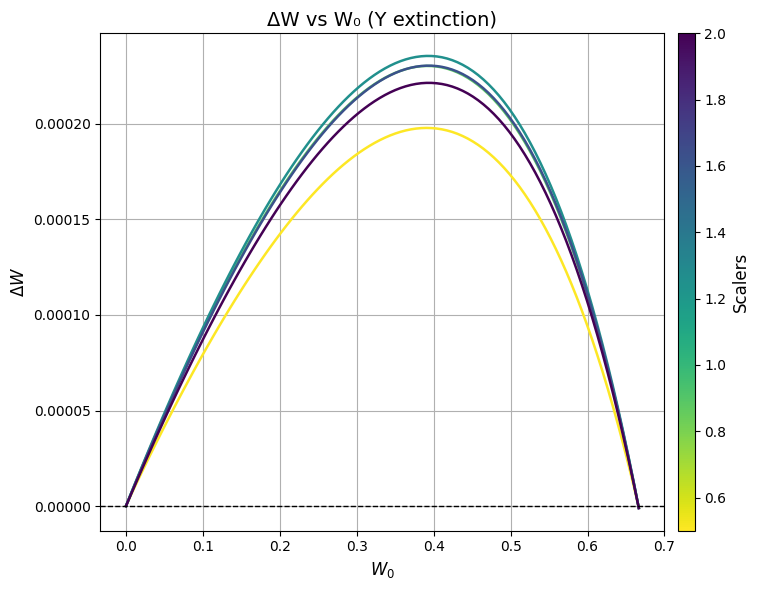

In [11]:
compare_scalers(W_birth, Y_birth, W_death, Y_death,
                       X_in, Z_in, X_out, Z_out, severity=severity,
                       Time=Time, dt=dt,
                       use_X=use_X, use_Z=use_Z, scale_X=True,
                       num_points=num_points,
                       scaler_range=(.5, 2), n_scaler=5,
                       perturb_W=False, perturb_Y=True,
                       tol=1e-7,
                       verbose=False)

In [4]:
cycles = 15000
extinction_rate = 25.0
W0 = 0.01
X0 = W0 / (X_out / X_in)


W,Y = compute_nontrivial_slice(W_birth, W_death, Y_birth, Y_death)
V0 = W - W0
Y0 = Y
Z0 = Y0/ (Z_out /Z_in)

print(f'W0 = {W0}, V0 = {V0}, Y0 = {Y0}, X0 = {X0}, Z0 = {Z0}')

x = run_cycles(V0, W0, Y0, X0, Z0,
               W_birth, Y_birth, W_death, Y_death,
               X_in, Z_in, X_out, Z_out,
               extinction_rate, dt,
               use_X, use_Z,
               cycles,
               severity,
               perturb_W=False,
               perturb_Y=True)

x = run_cycles_ext(V0, W0, Y0, X0, Z0,
               W_birth, Y_birth, W_death, Y_death,
               X_in, Z_in, X_out, Z_out,
               extinction_rates = [15, 25, 50, 100], dt = dt,
               use_X= use_X, use_Z = use_Z,
               cycles=
               cycles,
               severity = severity,
               perturb_W=False,
               perturb_Y=True)

W0 = 0.01, V0 = 0.6566666666666666, Y0 = 0.7500000000000002, X0 = 0.01, Z0 = 1.5000000000000004


KeyboardInterrupt: 

In [ ]:
cycles = 10000
extinction_rate = 50
U_out = 0.05
U_in = U_out
X_out = 0.06
X_in = X_out

W,Y = compute_nontrivial_slice(W_birth, W_death, Y_birth, Y_death)
W0 = W/2
X0 = W0 / (X_out / X_in)
V0 = W - W0
U0 = V0 / (U_out / U_in)
Y0 = Y
Z0 = Y0/ (Z_out /Z_in)
dt = 0.1

print(f'W0 = {W0}, V0 = {V0}, Y0 = {Y0}, X0 = {X0}, Z0 = {Z0}')


W0 = 0.3333333333333333, V0 = 0.3333333333333333, Y0 = 0.7500000000000002, X0 = 0.3333333333333333, Z0 = 1.5000000000000004


Scanning U_in: 100%|██████████| 20/20 [01:00<00:00,  3.03s/it]


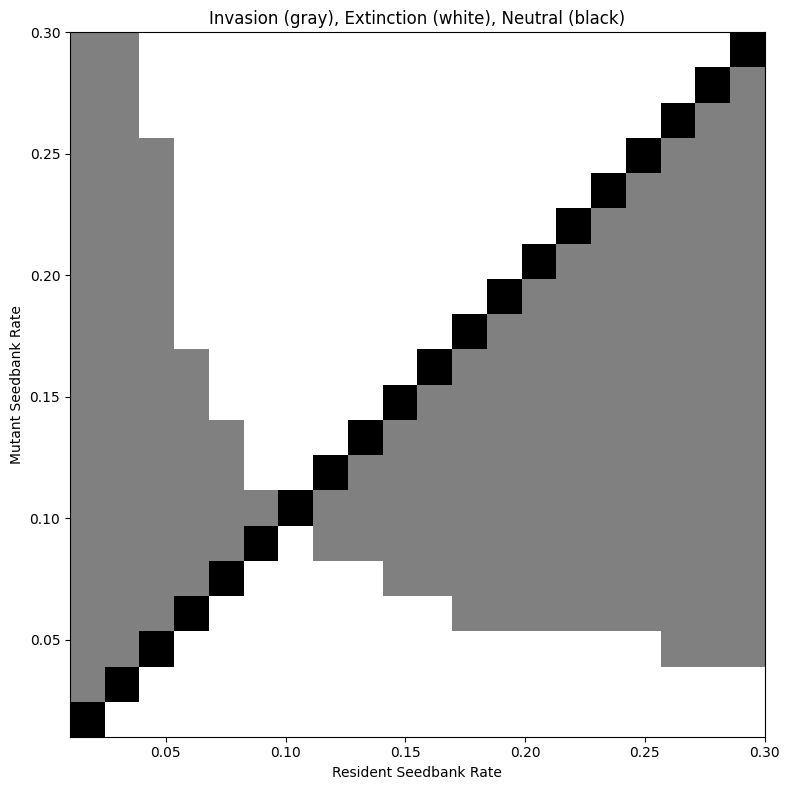

In [6]:

x = pairwise_invasion_plot(
    V0, W0, Y0,
    W_birth, Y_birth, 
    W_death, Y_death,
    Z_in, Z_out,
    extinction_rate, dt,
    use_X, use_Z,
    cycles, severity=0.7,
    grid_size=20,
    U_min=0.01, U_max=0.3,
    X_min=0.01, X_max=0.3)

Scanning U_in: 100%|██████████| 20/20 [24:46<00:00, 74.33s/it] 


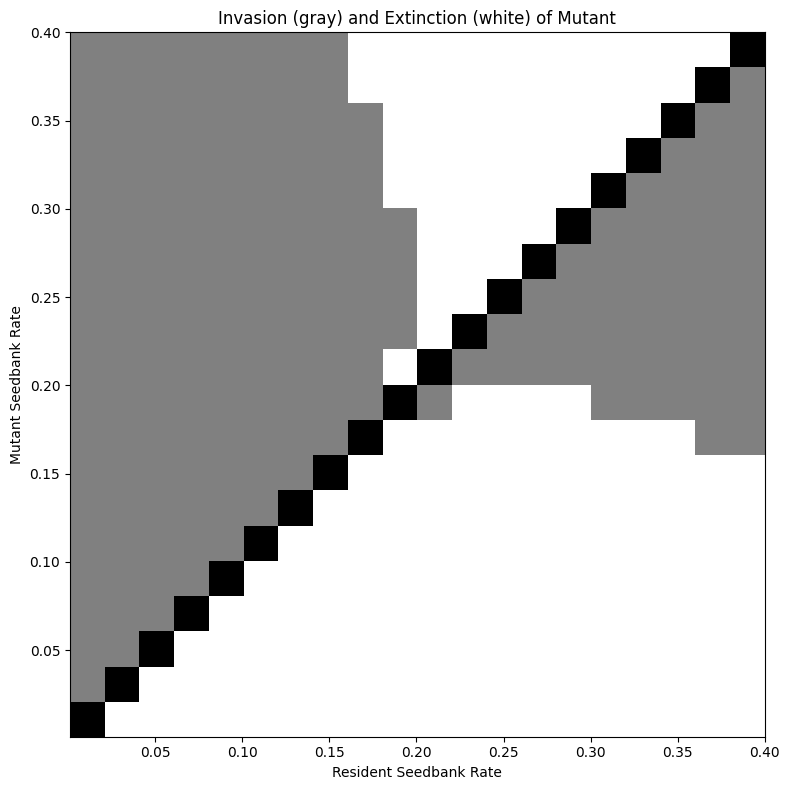

In [14]:
x = piplot(
    V0, W0, Y0,
    W_birth, Y_birth, W_death, Y_death,
    Z_in, Z_out,
    extinction_rate, dt,
    use_X, use_Z,
    cycles, severity,
    grid_size=20,
    U_min=0.001, U_max=0.4,
    X_min=0.001, X_max=0.4)


Computing local invasibility: 100%|██████████| 18/18 [07:16<00:00, 24.24s/it]


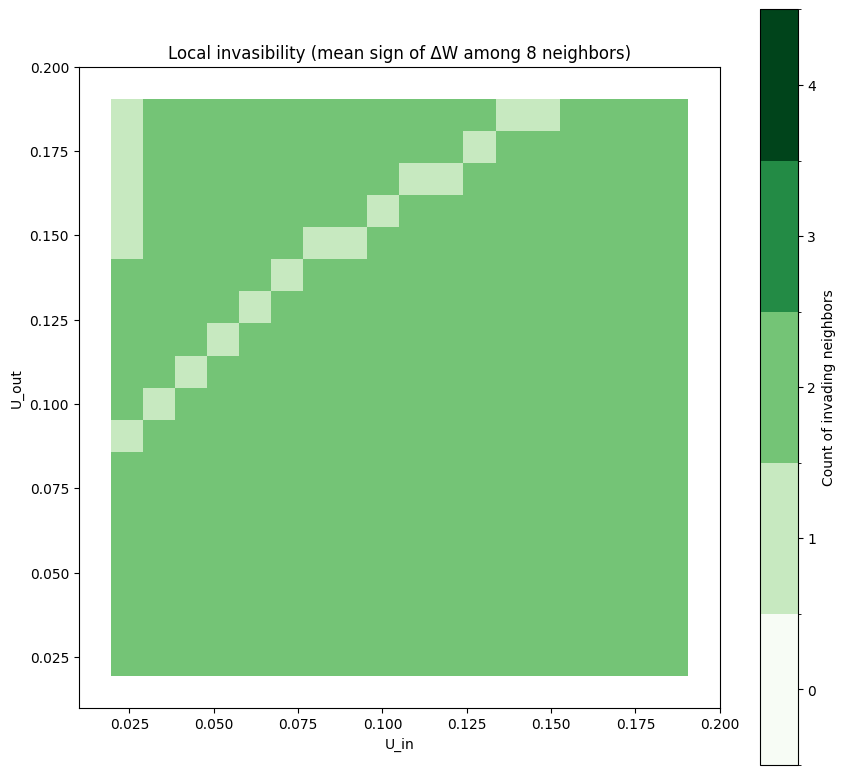

In [ ]:
x = local_invasibility_heatmap(
    V0, W0, Y0,
    W_birth, Y_birth, W_death, Y_death,
    Z_in, Z_out,
    extinction_rate, dt,
    use_X, use_Z,
    cycles, severity,
    grid_size=40,
    U_in_min  = 0.01,
    U_in_max  = 0.5, 
    U_out_min  = 0.01, 
    U_out_max  = 0.5

)

In [ ]:
def ivasion_controller(in_list, out_list, V0, W0, Y0,
               W_birth, Y_birth,
               W_death, Y_death,

               U_in, U_out,
               Z_in, Z_out,
               extinction_rate, dt,
               use_X, use_Z,
               severity,
               cycles=10000,
               perturb_W=False,
               perturb_Y=False,
               plot=False,
               stop=None):
    """Controller function for running invasions with given parameters."""

    U_in = in_list[U_in]
    U_out = out_list[U_out]

    neighbor_offsets = [         (-1,0),       
                        ( 0,-1),         ( 0,1),
                                 ( 1,0),       ]
    
    for di, dj in neighbor_offsets:
        X_in = in_list[U_in+di]
        X_out = out_list[U_out+dj]
        run_invasion(V0, W0, Y0,
               W_birth, Y_birth,
               W_death, Y_death,
               X_in, X_out,
               U_in, U_out,
               Z_in, Z_out,
               extinction_rate, dt,
               use_X, use_Z,
               severity,
               cycles,
               perturb_W=False,
               perturb_Y=False,
               plot=True,
               stop=None) 



